In [123]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from numpy.random import random, shuffle
%matplotlib inline

In [154]:
data_points = np.array([[0.1,0.3], [0.2, 0.6], [0.5,0.5], [0.7,0.4], [0.9,0.8]])
X = data_points[:, 0].reshape((1,5))
Y = data_points[:, 1].reshape((1,5))
learning_rate = 0.5
momentum = 0.9
'''
w1 = np.array([[0.5]])
w2 = np.ones((20,1))*0.5
w3 = np.ones((1,20))*0.5
'''
w1 = (np.random.random((1,1))-0.5)
w2 = (np.random.random((20,1))-0.5)
w3 = (np.random.random((1,20))-0.5)
b1 = np.array([[0.5]])
b2 = np.ones((20,1))*0.5
b3 = np.array([[0.5]])
W = [w1,w2,w3]
B = [b1,b2,b3]
A = dict()
Z = dict()
g_W_prev = [np.zeros((1,1)),np.zeros((20,1)), np.zeros((1,20))]
g_B_prev = [np.zeros((1,1)),np.zeros((20,1)), np.zeros((1,1))]

In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    f = sigmoid(x)
    df = f * (1 - f)
    return df

In [49]:
def forward_prop(X, W, B):
    '''
    All output function the same: sigmoid
    '''
    input_vec = X
    for idx in range(len(W)):
        Z[idx] = W[idx].dot(input_vec) + B[idx]
        A[idx] = sigmoid(Z[idx])
        input_vec = A[idx]
    return Z, A

In [58]:
def back_prop(Y, W, B, X, A, Z):
    N = A[2].shape[1]

    delta3 = - (Y - A[2])
    delta2 = (W[2].T.dot(delta3))*d_sigmoid(Z[1])
    delta1 = (W[1].T.dot(delta2))*d_sigmoid(Z[0])
    
    g_w3 = delta3.dot(A[1].T)/ N
    g_w2 = delta2.dot(A[0].T)/ N
    g_w1 = delta1.dot(X.T)/ N

    g_b1 = np.mean(delta1, axis=1, keepdims=True)
    g_b2 = np.mean(delta2, axis=1, keepdims=True)
    g_b3 = np.mean(delta3, axis=1, keepdims=True)
    
    return [g_w1,g_w2,g_w3], [g_b1,g_b2,g_b3]

In [73]:
def update(g_W, g_B):
    for idx, paras in enumerate(zip(W, g_W)):
        W[idx] -= paras[1] * learning_rate + g_W_prev[idx]
    for idx, paras in enumerate(zip(B, g_B)):
        B[idx] -= paras[1] * learning_rate + g_B_prev[idx]

In [85]:
def error():
    _, A = forward_prop(X, W, B)
    Y_hat = A[2]
    loss = np.sum((Y_hat-Y) **2)/2
    return loss

In [148]:
def iterate():
    Z, A = forward_prop(X, W, B)
    g_W, g_B = back_prop(Y, W, B, X, A, Z)
    update(g_W, g_B)

In [139]:
def test(test_x):
    _ , A = forward_prop(np.array([test_x]), W, B)
    return A[2]

In [145]:
def get_figure():
    plt.scatter(X, Y)
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    test_x = np.linspace(0, 1, 1000)
    test_y = test(test_x)
    test_y = test_y.reshape(1000)
    plt.plot(test_x, test_y)

# Results

## Initial error / figure

In [155]:
error()

0.088198359849636726

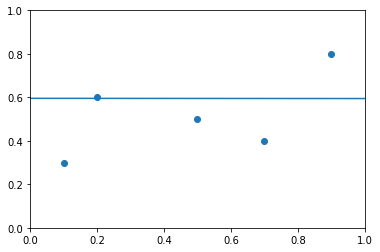

In [156]:
get_figure()

In [149]:
for _ in range(30000):
    iterate()

## After 3000 Iterations

In [151]:
error()

0.028231687808745371

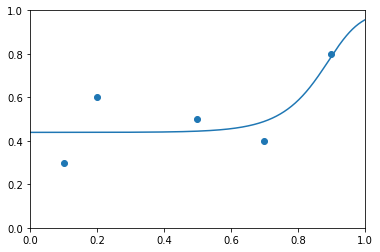

In [150]:
get_figure()

## After 150000 Iterations

In [167]:
for _ in range(100000):
    iterate()

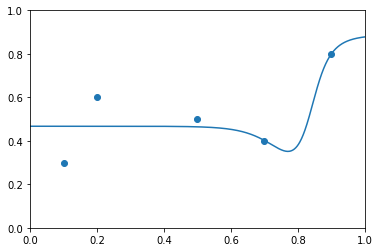

In [168]:
get_figure()

In [170]:
error()

0.0234273264363664